# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [1]:
import numpy as np
from scipy.linalg import svd

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [2]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [3]:
def svd_validation(A):
    a, b = A.shape
    u, s, vh = svd(A)
    print(A)
    summatory = np.zeros(shape=(a,b))
    print(summatory)
    print(s)
    for i in np.arange(min(A.shape)):
        temp_matrix = s[i]*(u[:,i].reshape(a,1)*vh[i,:].reshape(1,b))
        summatory += temp_matrix
    print(summatory)
    return np.allclose(A,summatory)

In [4]:
A_test = np.random.randint(100, size=(20, 5))

svd_validation(A_test)

[[51 92 14 71 60]
 [20 82 86 74 74]
 [87 99 23  2 21]
 [52  1 87 29 37]
 [ 1 63 59 20 32]
 [75 57 21 88 48]
 [90 58 41 91 59]
 [79 14 61 61 46]
 [61 50 54 63  2]
 [50  6 20 72 38]
 [17  3 88 59 13]
 [ 8 89 52  1 83]
 [91 59 70 43  7]
 [46 34 77 80 35]
 [49  3  1  5 53]
 [ 3 53 92 62 17]
 [89 43 33 73 61]
 [99 13 94 47 14]
 [71 77 86 61 39]
 [84 79 81 52 23]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[524.51676881 153.04421745 146.80147914 115.93079001  87.29836421]
[[51. 92. 14. 71. 60.]
 [20. 82. 86. 74. 74.]
 [87. 99. 23.  2. 21.]
 [52.  1. 87. 29. 37.]
 [ 1. 63. 59. 20. 32.]
 [75. 57. 21. 88. 48.]
 [90. 58. 41. 91. 59.]
 [79. 14. 61. 61. 46.]
 [61. 50. 54. 63.  2.]
 [50

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

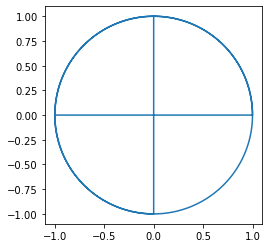

In [7]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [8]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


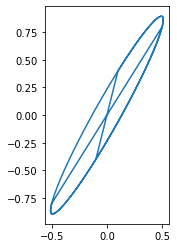

In [9]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [10]:
u, s, vh = svd(A)

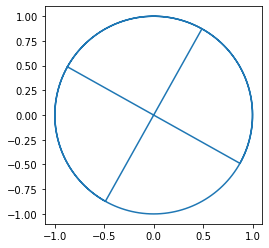

In [11]:
show_circle(u @ circle)

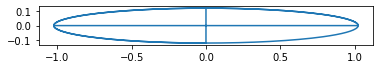

In [12]:
show_circle(np.diag(s) @ circle)

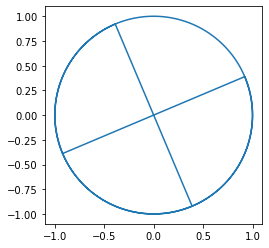

In [13]:
show_circle(vh @ circle)

__Respuesta:__ Tanto $U$ y $V^H$ son operadores que rotan la circunferencia, el hecho de que sean unitarias preserva las dimensiones de lo que se está rotando ya sea unitario o no, por otro lado $\Sigma$ corresponde a un "achatamiento" en el eje vertical, es decir transforma la circunferencia en una elipse.

__Respuesta:__ Aplicar estas transformaciones en orden es equivalente a aplicar la transformación $A$, lo cual es logico ya que al ser una descomposición lo único que ocurre es que la transformación $A$ se separa en pasos: rotar, achatar y restaurar rotación.

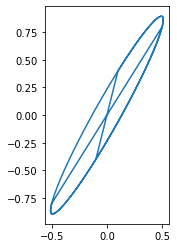

In [14]:
show_circle(u @ np.diag(s) @ vh @ circle)

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [15]:
from pathlib import Path
from PIL import Image

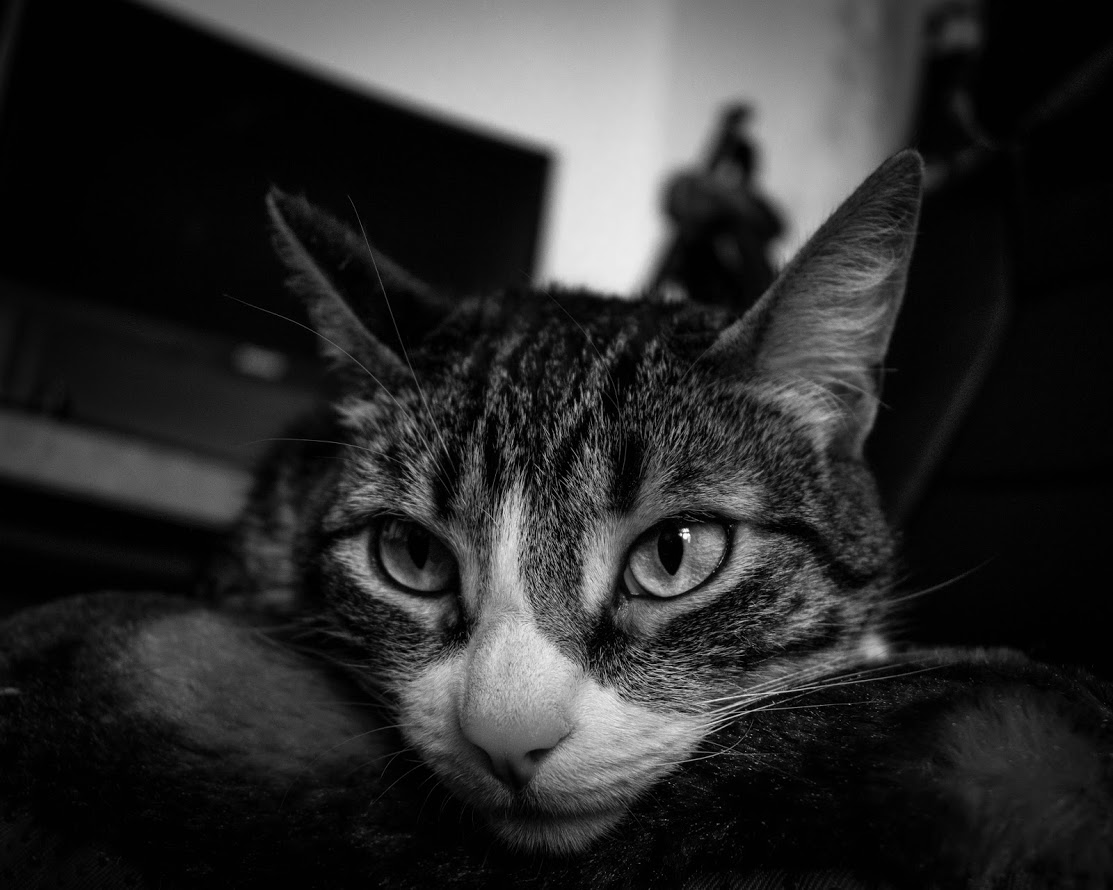

In [16]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [17]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [18]:
def low_rank_svd_approximation(A, l):
    a, b=A.shape
    u, s, vh = svd(A)
    summatory=np.zeros(shape=(a,b))
    for i in np.arange(l):
        temp_matrix=s[i]*u[:,i].reshape(a,1)@vh[i,:].reshape(1,b)
        summatory+=temp_matrix
    return summatory

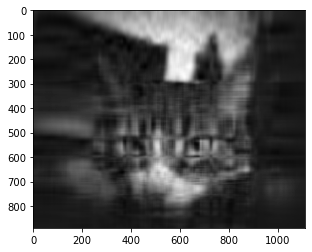

In [19]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

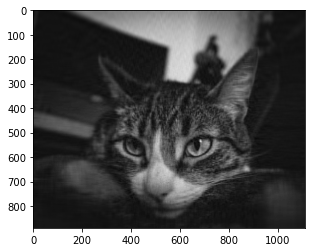

In [20]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [21]:
d=np.array([1,2,3,4,5])
d[0:len(d)]

array([1, 2, 3, 4, 5])

In [22]:
def low_rank_svd_tol_approximation(A, tol):
    u, s, vh = svd(A)
    l=0
    denom=sum(k*k for k in s)
    for i in range(len(s)):
        num=sum(k*k for k in s[i:len(s)])
        if (num/denom)**(1/2) <= tol:
            l=i
            print(l)
            break
    return low_rank_svd_approximation(A, l)

64


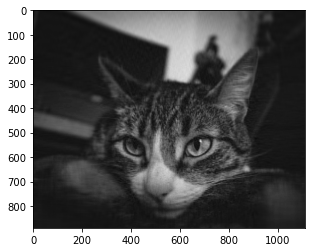

In [23]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

457


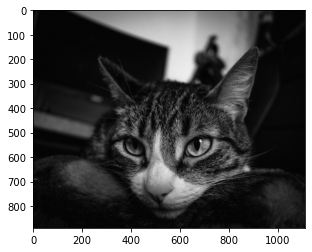

In [24]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

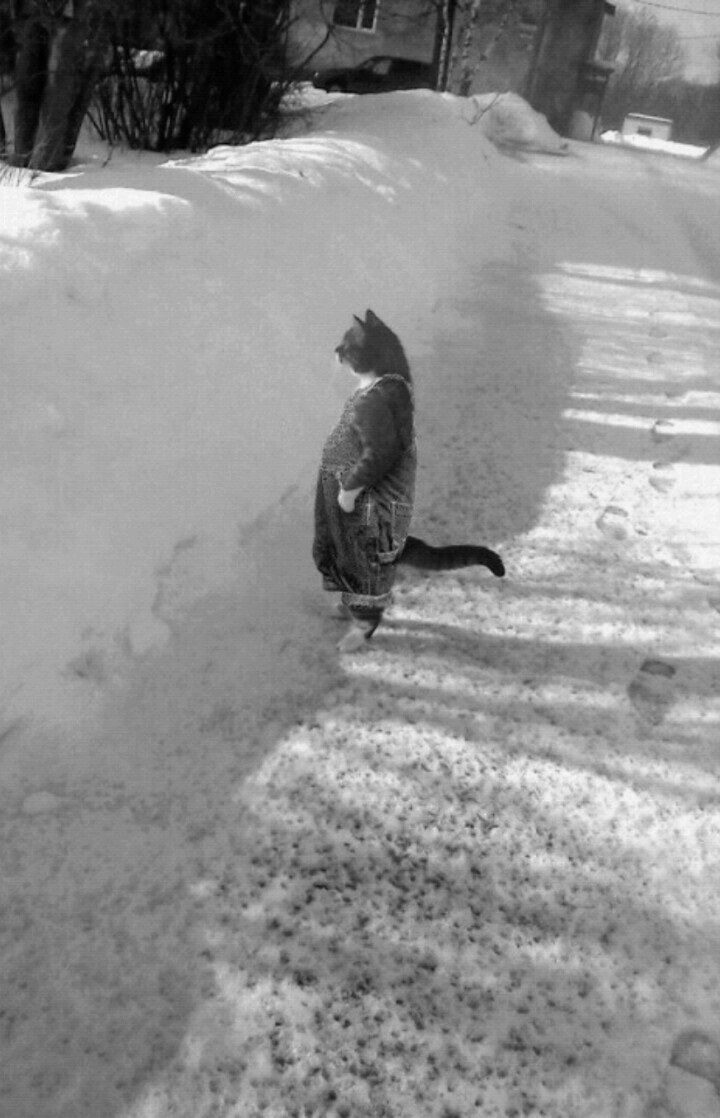

In [25]:
your_img_name = "gato.jpg"
your_img = Image.open(Path().resolve().parent / "images" / your_img_name ).convert('L')
your_img

In [26]:
your_img_np = np.array(your_img)

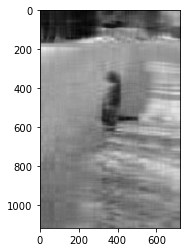

In [27]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

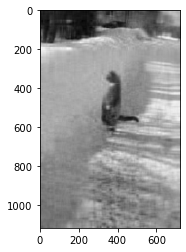

In [28]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

7


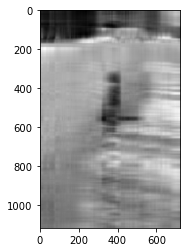

In [29]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

174


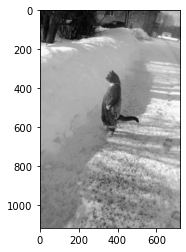

In [30]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [31]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [32]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,9888.0,3994.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,36.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Magallanes,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,947.9
358,Magallanes,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,...,9.0,9.0,14.0,16.0,18.0,18.0,18.0,19.0,20.0,2936.9
359,Magallanes,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,2.0,8.0,12.0,13.0,13.0,13.0,19.0,19.0,21.0,7446.8
360,Magallanes,12,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,195.9


In [44]:
start_date = pd.to_datetime("2020-10-01")
end_date = pd.to_datetime("2020-10-11")

In [45]:
covid_tasa_promedio_nuevos = (covid_comunas.dropna(subset=["codigo_comuna"]).fillna(0)
    .melt(id_vars=['region','comuna','poblacion'], value_vars=covid_comunas.columns[5:-1], 
          var_name='fecha', value_name='casos_totales')
    .sort_values(by=["fecha"]))

covid_tasa_promedio_nuevos["fecha"]=pd.to_datetime(covid_tasa_promedio_nuevos["fecha"])
covid_tasa_promedio_nuevos["casos_nuevos"]=covid_tasa_promedio_nuevos.groupby(["region","comuna"])["casos_totales"].diff()

mask=(covid_tasa_promedio_nuevos["fecha"] >= start_date) & (covid_tasa_promedio_nuevos['fecha'] <= end_date)
covid_tasa_promedio_nuevos=covid_tasa_promedio_nuevos[mask]

covid_tasa_promedio_nuevos=covid_tasa_promedio_nuevos.groupby(["region","comuna","poblacion"]).agg(promedio_casos_nuevos=("casos_nuevos","mean")).reset_index()

covid_tasa_promedio_nuevos["tasa_promedio_casos_nuevos"]=100000*covid_tasa_promedio_nuevos["promedio_casos_nuevos"]/covid_tasa_promedio_nuevos["poblacion"]
covid_tasa_promedio_nuevos=covid_tasa_promedio_nuevos.sort_values(by=["tasa_promedio_casos_nuevos"],ascending=False).reset_index(drop=True)

In [46]:
covid_tasa_promedio_nuevos

,region,comuna,poblacion,promedio_casos_nuevos,tasa_promedio_casos_nuevos
0,Magallanes,Timaukel,282.0,3.333333,1182.033097
1,Magallanes,San Gregorio,681.0,4.000000,587.371512
2,Magallanes,Laguna Blanca,264.0,1.333333,505.050505
3,Magallanes,Porvenir,7323.0,34.333333,468.842460
4,Magallanes,Punta Arenas,141984.0,631.333333,444.651040
...,...,...,...,...,...
341,Aysén,OHiggins,661.0,0.000000,0.000000
342,Coquimbo,Rio Hurtado,4372.0,0.000000,0.000000
343,Aysén,Cochrane,3685.0,0.000000,0.000000
344,Magallanes,Antartica,137.0,0.000000,0.000000


__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__ estas comunas tienen una tasa de casos nuevos extremadamente alta, esto seguramente se debe a que la población es muy pequeña y una tasa es "porcentual", por lo tanto unos pocos casos nuevos impactan mucho el factor tasa en comparación a comunas grandes. 

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [51]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,728,794,738,737,832,542,343,706,777,1058
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,648,972,932,1046,1044,796,714,694,946,1752
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,1229,1571,1890,2239,3825,1749,1354,1858,1238,1906
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,319,792,838,1020,939,563,340,237,838,863
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,823,1008,1128,1057,1026,473,1503,1050,1125,1351
5,Valparaíso,5,1960170,301.0,249.0,248.0,273.0,223.0,92.0,385.0,...,3094,3257,3185,3309,2640,1410,1798,2740,3285,2612
6,Metropolitana,13,8125072,5383.0,3185.0,2105.0,3861.0,1850.0,1656.0,2694.0,...,11451,12030,13020,12669,13041,5081,6485,11546,12089,13772
7,O’Higgins,6,991063,68.0,NaN,74.0,NaN,74.0,30.0,30.0,...,1323,1537,1595,1435,1315,692,655,1490,1428,1469
8,Maule,7,1131939,397.0,219.0,NaN,341.0,113.0,160.0,NaN,...,1494,1916,2264,2327,1588,640,746,1567,1929,1897
9,Ñuble,16,511551,364.0,NaN,259.0,189.0,65.0,NaN,NaN,...,929,1150,1032,1054,971,981,536,1144,948,1080


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [50]:
covid_pcr_melt = covid_pcr.melt(id_vars=['region'], value_vars=covid_pcr.columns[3:], 
          var_name='fecha', value_name='nm_pcr').fillna(0)
covid_pcr_melt["fecha"]=pd.to_datetime(covid_pcr_melt["fecha"])

covid_pcr_melt

,region,fecha,nm_pcr
0,Arica y Parinacota,2020-04-09,70.0
1,Tarapacá,2020-04-09,0.0
2,Antofagasta,2020-04-09,182.0
3,Atacama,2020-04-09,57.0
4,Coquimbo,2020-04-09,0.0
...,...,...,...
3291,Araucanía,2020-10-31,1716.0
3292,Los Ríos,2020-10-31,1012.0
3293,Los Lagos,2020-10-31,3670.0
3294,Aysén,2020-10-31,235.0


Obtén el dataframe `covid_casos_melt` utilizando `covid_casos` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [38]:
covid_casos_melt = covid_comunas.melt(id_vars=['region'], value_vars=covid_comunas.columns[5:-1], 
          var_name='fecha', value_name='casos_totales').fillna(0)
covid_casos_melt["fecha"]=pd.to_datetime(covid_casos_melt["fecha"])

covid_casos_melt=covid_casos_melt.groupby(["region","fecha"]).agg(casos_totales=("casos_totales", "sum")).reset_index()
covid_casos_melt

,region,fecha,casos_totales
0,Antofagasta,2020-03-30,29.0
1,Antofagasta,2020-04-01,32.0
2,Antofagasta,2020-04-03,49.0
3,Antofagasta,2020-04-06,65.0
4,Antofagasta,2020-04-08,72.0
...,...,...,...
1019,Ñuble,2020-10-16,9129.0
1020,Ñuble,2020-10-19,9270.0
1021,Ñuble,2020-10-24,9534.0
1022,Ñuble,2020-10-26,9634.0


Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [53]:
covid_corr_casos_pcr = covid_pcr_melt.merge(covid_casos_melt, on=["region","fecha"], how="outer")
covid_corr_casos_pcr["nm_pcr"]=covid_corr_casos_pcr["nm_pcr"].fillna(0)
covid_corr_casos_pcr["casos_totales"]=covid_corr_casos_pcr["casos_totales"].fillna(method="ffill")
covid_corr_casos_pcr.groupby(["region"]).apply(lambda df: df["nm_pcr"].corr(df["casos_totales"])).sort_values()

region
Metropolitana         0.337441
Valparaíso            0.539941
Antofagasta           0.566419
Atacama               0.590239
Aysén                 0.621784
Biobío                0.651685
O’Higgins             0.654382
Magallanes            0.660086
Maule                 0.671916
Tarapacá              0.690743
Los Ríos              0.706987
Ñuble                 0.722113
Los Lagos             0.741480
Coquimbo              0.749326
Arica y Parinacota    0.785633
Araucanía             0.835060
dtype: float64

__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__ Las regiones más pobladas de Chile son las que tienen menor correlación pcr's a casos totales, tiene lógica que estas regiones son las que tienen más casos y menos control de estos además de una cantidad máxima posible de pcr's que seguramente se está alcanzando, básicamente que en estas regiones la cantidad de pcr's no le puede seguir el ritmo a la cantidad de contagiados a diferencia de regiones menos masivas, en las que es mucho más fácil controlar todos los casos que surgen.

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ Por tiempo no alcanzo a implementarlo, pero mi idea era tomar "Data Product 1 - Casos totales por comuna incremental" y "Data Product 3 - Casos totales por región incremental" para contrastar el crecimiento de casos en la comuna de San Antonio y la región de Valparaíso, y así determinar que tan bueno ha sido el control en San Antonio respecto a la región.

In [40]:
# FIX ME PLEASE #

__Respuesta:__

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ La idea es tomar "Data Product 13 - Casos nuevos totales por región incremental" y "Data Product 14 - Fallecidos con COVID-19 por región incremental" para contrastar la tasa de casos nuevos y fallecidos y determinar que regiones han tenido un mejor/peor tratamiento de sus casos y establecer que región necesita fortalecer su red asistencial.

In [41]:
# FIX ME PLEASE #

__Respuesta:__